## optimize parameter k

### Import package

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from core.core import *

### Load data

In [2]:
pool_matrix = pd.read_excel('data/sensing_matrix_15drugs.xlsx')
pool_matrix = pool_matrix.fillna(0)

# data path
input_path = 'data/preprocessed/PL_HepG2_F.csv'
protein_table = pd.read_csv(input_path)

### Set k range of 2 - 4

In [3]:
result_k = {}
for k in range(2, 5):
    scores, fold_changes = post_analysis(protein_table, pool_matrix, klist = False, drug_num = k)
    result_k[k] = scores

100%|█████████████████████████████████████████████████████████████████████████████| 4056/4056 [00:16<00:00, 246.29it/s]


### Calculate identified kinases

In [4]:
kins = pd.read_csv('data/UniprotID_family-Kinase.txt', sep = '\t')
kins = kins['ID'].values
atpb = pd.read_csv('data/UniprotID_ATPbinding.txt', sep = '\t')
atpb = atpb['ID'].values
tars = np.union1d(kins, atpb)
print(len(tars))

x, y1, y2 = [], [], []
idkins = {}
falpos = {}
for k in result_k.keys():
    tab = result_k[k]
    sig = tab[tab['Staurosporine'] >= 0.15]['Accession'].values
    trues = np.intersect1d(sig, tars)
    falses = np.setdiff1d(sig, tars)
    idkins['k={}'.format(k)] = list(trues)
    falpos['k={}'.format(k)] = list(falses)
    x.append('k={}'.format(k))
    y1.append(len(trues))
    y2.append(len(falses))


df = pd.DataFrame(data={'kinase & ATP binding': y1, 'others': y2})
df.index = x

2428


### Plot results

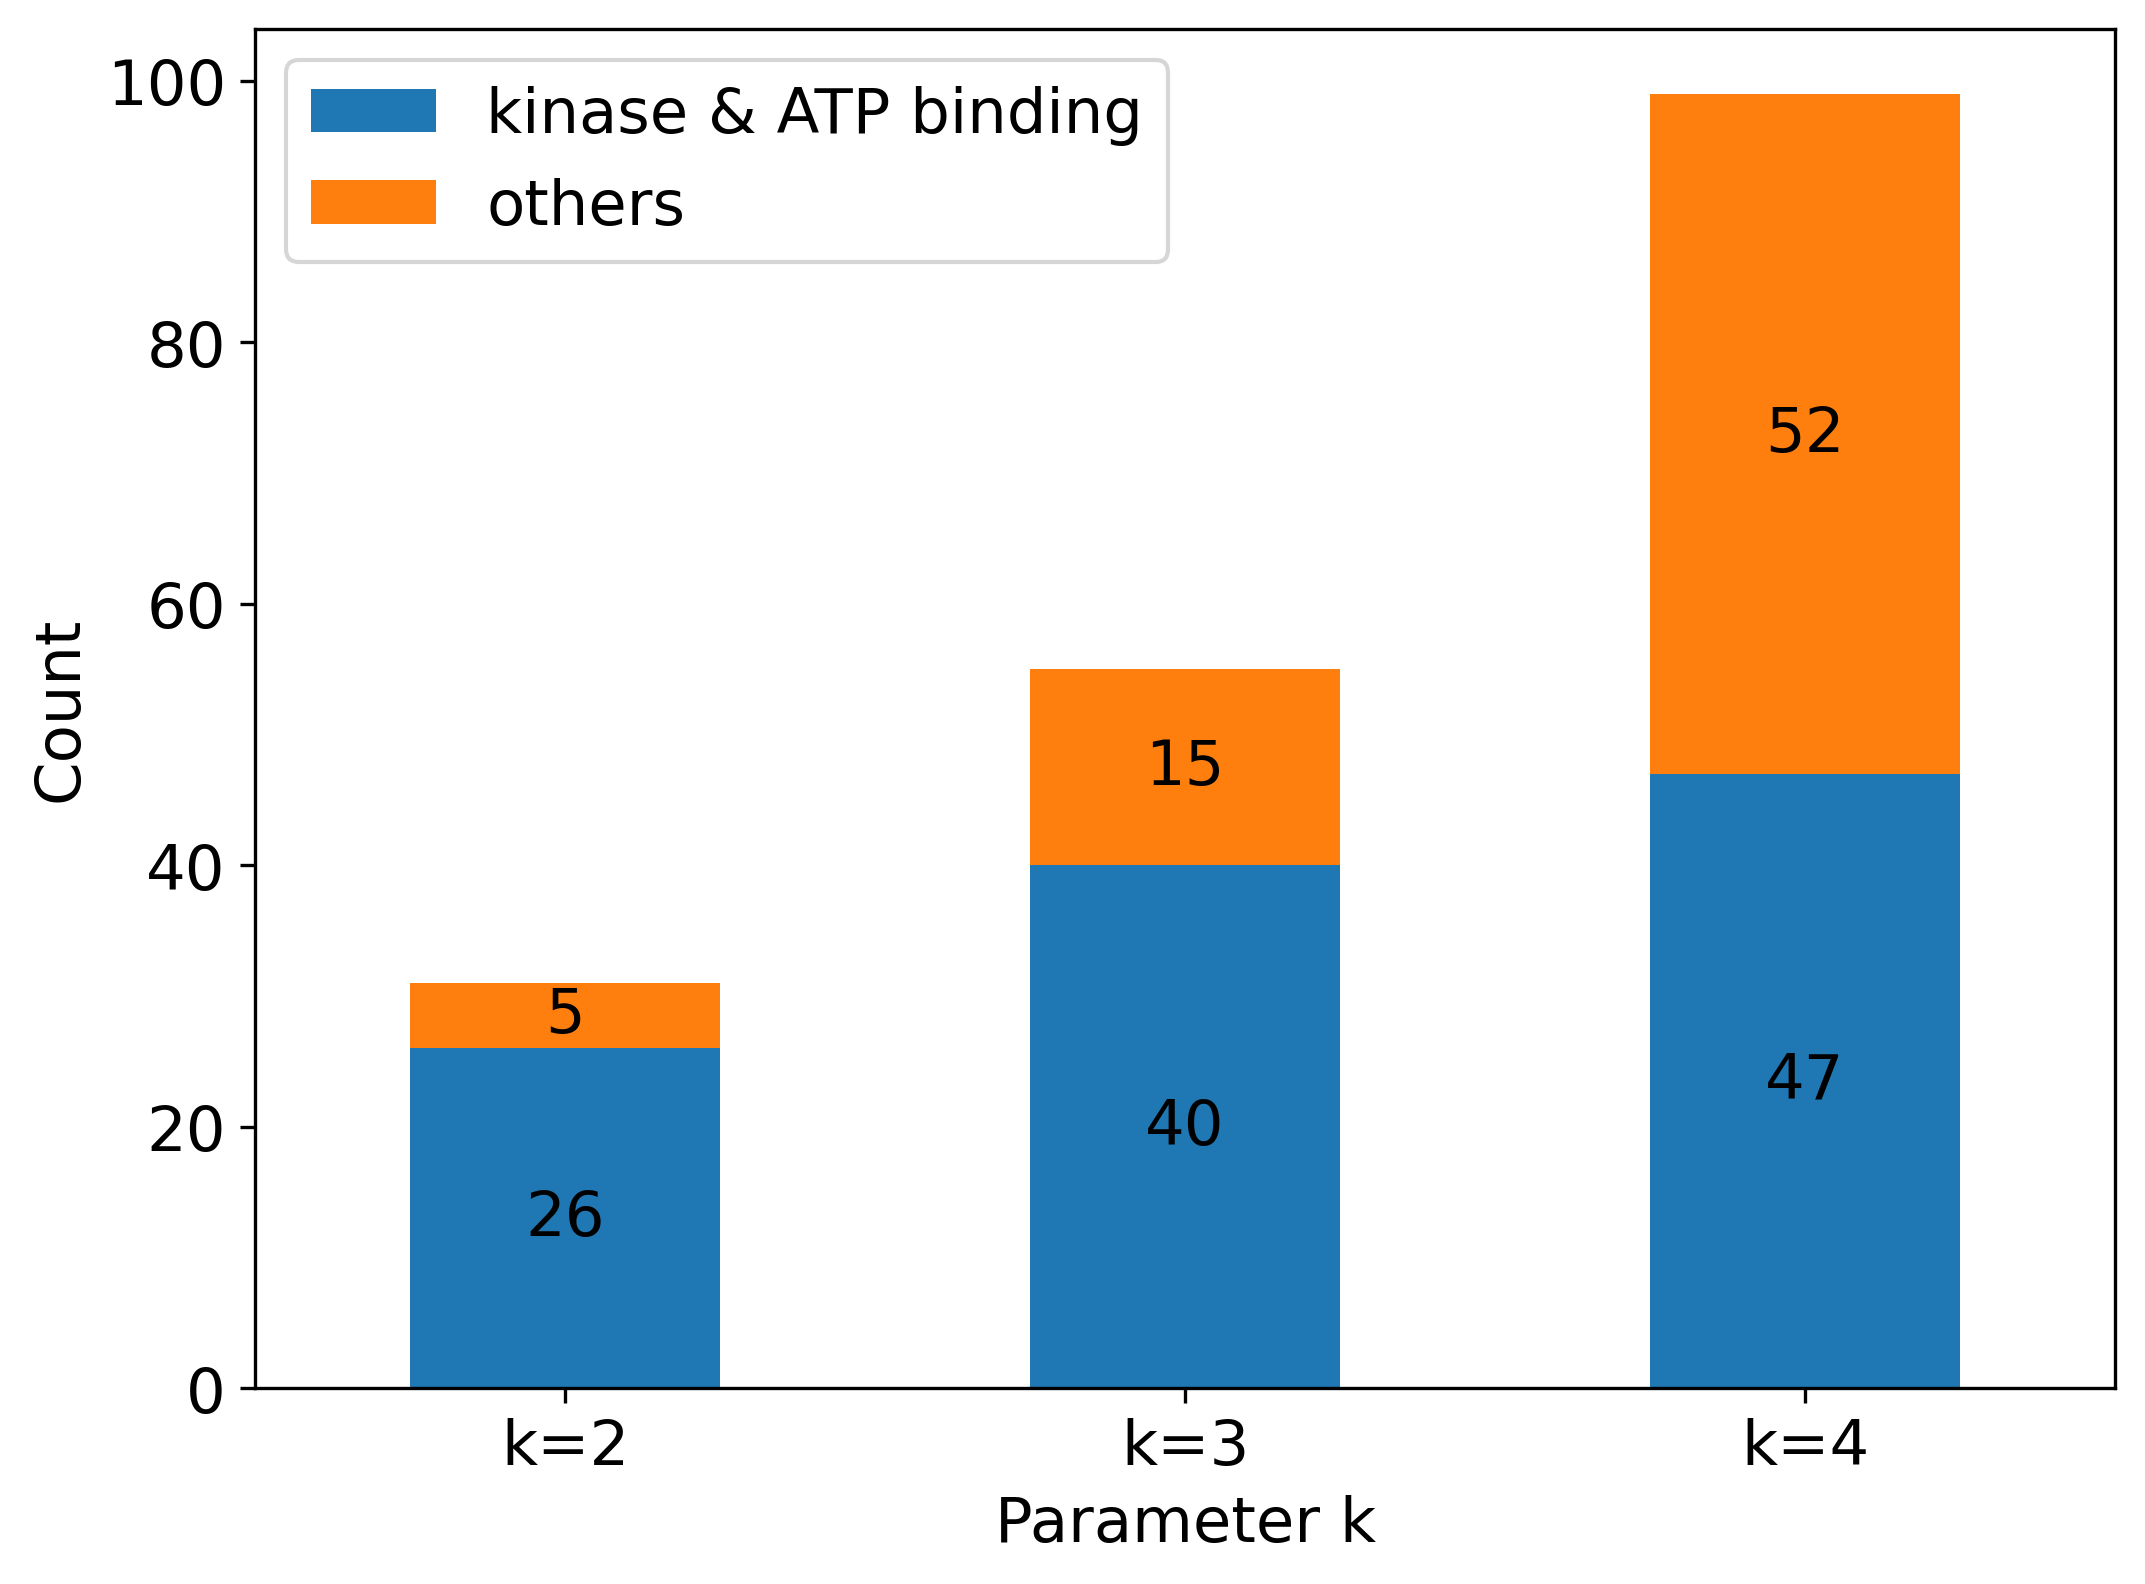

In [5]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 15
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Parameter k', ylabel='Count')
for c in ax.containers:
    labels = np.round([v.get_height() if v.get_height() > 0 else '' for v in c]).astype(int)
    ax.bar_label(c, labels=labels, label_type='center')